# Model Development – Fraud Detection System

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

### Feature Selection  
We use `feature_selection.py` to:  
1. Load the dataset and remove non-informative columns.  
2. Visualize feature correlations with a heatmap.  
3. List the remaining features for modeling.


2025-02-13 14:57:13,162 - INFO - Loaded data and dropped non-informative columns: ['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'country']


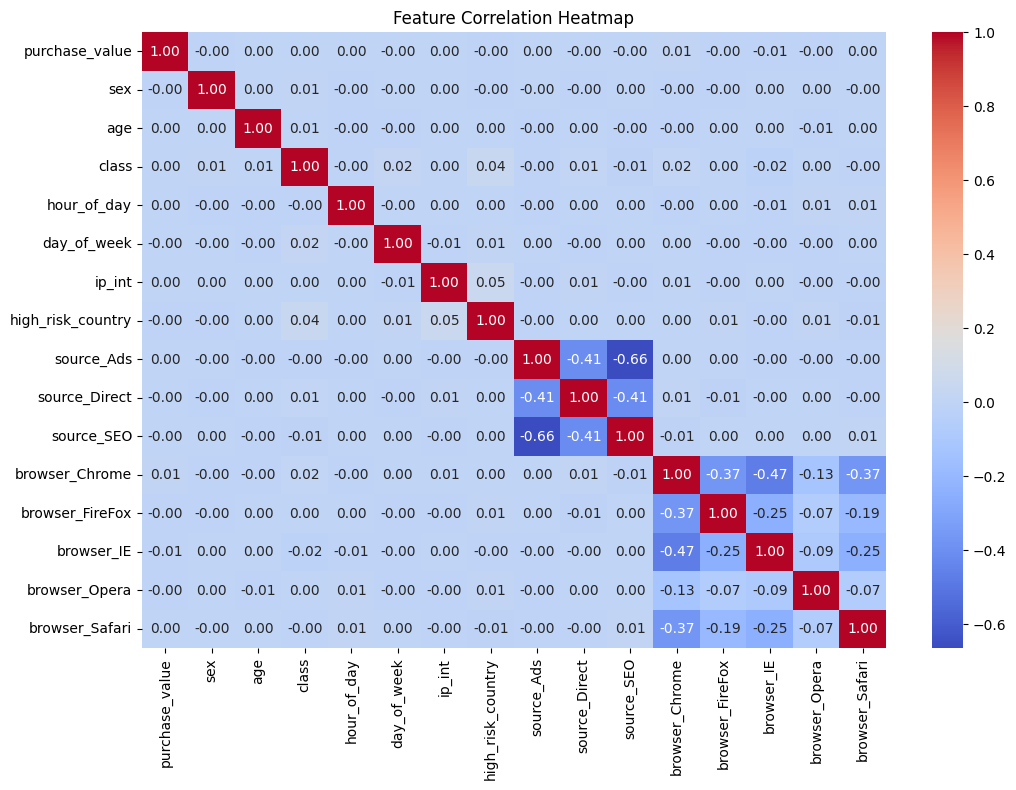

2025-02-13 14:57:13,401 - INFO - Plotted feature correlation heatmap.


Remaining Features: ['purchase_value', 'sex', 'age', 'class', 'hour_of_day', 'day_of_week', 'ip_int', 'high_risk_country', 'source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari']


In [2]:
from scripts.feature_selection import FeatureSelector

# Initialize FeatureSelector
selector = FeatureSelector(data_path="../data/preprocessed/Final_Fraud_Data.csv")

# Load and preprocess data
data = selector.load_data()

# Plot correlation heatmap
selector.plot_correlation_heatmap()

# Display remaining features
remaining_features = selector.get_remaining_features()
print("Remaining Features:", remaining_features)

## 🔍 Analysis of Feature Correlations

### Key Observations

1. **Most features have very low correlation with the fraud class (class)**
    - Highest correlation: `high_risk_country` (0.04)
    - Other features have weak correlations (< 0.02)
    - This suggests fraud is not strongly dependent on any single feature but rather complex interactions between features.

2. **Highly Correlated Categorical Variables**
    - `source_Ads`, `source_Direct`, and `source_SEO` are strongly correlated (negative correlations up to -0.66).
    - `browser_Chrome`, `browser_IE`, and `browser_FireFox` have notable correlations (up to -0.47).
    - **Issue**: High correlation among features can cause multicollinearity, which may reduce model interpretability.

3. **IP Address Integer (`ip_int`) Shows Some Relationship**
    - `ip_int` has a 0.05 correlation with `high_risk_country`.
    - Since IP addresses are categorical in nature, we may need further feature engineering (e.g., group IPs into regions instead of treating them as raw numbers).

### 🚀 Recommendations Before Model Training

1. **Drop highly correlated categorical features**
    - Since `source_Ads`, `source_Direct`, and `source_SEO` are strongly correlated, we should keep only two of them to avoid redundancy.
    - Similarly, for `browser_*`, keeping 3 out of 5 should reduce multicollinearity.

2. **Investigate `ip_int` further**
    - If it provides useful patterns, we can bin IPs into ranges to improve effectiveness.

3. **Proceed to Data Splitting**
    - Once final features are selected, we split the dataset into training and test sets for model training.

    ___

### Feature Selection & Data Splitting  
We refine the dataset by:  
1. Dropping highly correlated features to avoid multicollinearity.  
2. Splitting the data into training (80%) and testing (20%) sets for model training.


In [3]:
# Drop highly correlated features
data = selector.drop_highly_correlated_features(threshold=0.5)

# Perform train-test split
X_train, X_test, y_train, y_test = selector.split_data()

# Save train-test sets for modeling
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

# Display final feature set
print("Final Features:", list(X_train.columns))


2025-02-13 14:57:13,453 - INFO - Dropped highly correlated features: ['source_SEO']
2025-02-13 14:57:13,479 - INFO - Data split into train (103316) and test (25830) sets.


Final Features: ['purchase_value', 'sex', 'age', 'hour_of_day', 'day_of_week', 'ip_int', 'high_risk_country', 'source_Ads', 'source_Direct', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari']


✅ Feature Selection & Data Splitting Completed! 🎉

### Key Observations

1️⃣ **Dropped Highly Correlated Features**
- Removed `source_SEO` to reduce multicollinearity.
- Retained `source_Ads` and `source_Direct` for better fraud detection insights.

2️⃣ **Final Features Selected for Model Training**
- **Numerical Features:** `purchase_value`, `age`, `hour_of_day`, `day_of_week`, `ip_int`
- **Categorical Features (Encoded):** `sex`, `high_risk_country`, `source_Ads`, `source_Direct`, `browser_*`

3️⃣ **Data Successfully Split**
- **Training Set:** 103,316 rows (80%)
- **Testing Set:** 25,830 rows (20%)
___

### Baseline Model: Logistic Regression  
We train a **Logistic Regression** model to establish a benchmark for fraud detection.  
We will evaluate its performance using:
- Precision, Recall, and F1-score
- ROC-AUC score
- Confusion Matrix


In [19]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/logistic_regression.pkl"
)

# Load dataset
trainer.load_data()

# Train Logistic Regression model
trainer.train_logistic_regression()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-13 19:18:58,560 - INFO - Successfully loaded training and testing datasets.
2025-02-13 19:18:58,604 - INFO - Logistic Regression model trained successfully.
2025-02-13 19:18:58,616 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     23376
           1     0.0950    1.0000    0.1735      2454

    accuracy                         0.0950     25830
   macro avg     0.0475    0.5000    0.0868     25830
weighted avg     0.0090    0.0950    0.0165     25830

2025-02-13 19:18:58,617 - INFO - ROC-AUC Score: 0.5132
2025-02-13 19:18:58,617 - INFO - Confusion Matrix:
[[    0 23376]
 [    0  2454]]
2025-02-13 19:18:58,618 - INFO - Model saved successfully at ../models/logistic_regression.pkl


### 🔍 Analysis of Logistic Regression Performance

#### 🚨 Key Observations

1️⃣ **Severe Class Imbalance Issue**
- All non-fraud cases (Class 0) are misclassified → Precision & Recall = 0.0000 😬
- All fraud cases (Class 1) are predicted correctly → But this is not ideal!
- This suggests that the model is biased and doesn’t generalize well.

2️⃣ **ROC-AUC Score is Poor (0.5132)**
- A random guess would give 0.5, so our model is barely better than guessing.
- This confirms that the model struggles to differentiate fraud from non-fraud.

3️⃣ **Confusion Matrix is Highly Skewed**
- 23376 non-fraud cases misclassified (all predicted as fraud).
- 2454 fraud cases correctly predicted, but at the cost of massive false positives.
- This is a highly imbalanced dataset, and the model is simply predicting fraud for everything.

#### ⚠️ Why Did This Happen?
- **Class Imbalance** – Fraud cases make up only ~9% of the dataset. The model overcompensates by predicting fraud for everything.
- **Logistic Regression's Simplicity** – It’s a linear model, which may not capture complex fraud patterns well.
- **Possible Data Issues** – Features like `ip_int` might not contribute useful patterns.

#### ✅ Recommendations to Fix This
1️⃣ **Try a Better Model** → Decision Tree or Random Forest can handle class imbalance better.
2️⃣ **Use Sampling Techniques**
- SMOTE (Synthetic Minority Over-sampling Technique) → To create synthetic fraud cases.
- Undersampling Majority Class → To balance fraud/non-fraud cases.

3️⃣ **Feature Engineering Tweaks**
- Check if `ip_int` is meaningful or should be replaced.
- Try feature interactions (e.g., `purchase_value * high_risk_country`).
___

### SMOTE & Decision Tree Classifier  
To address the severe class imbalance, we use **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic fraud cases.  
We then train a **Decision Tree model** on the balanced dataset and evaluate its performance.  


In [14]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/decision_tree.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Train Decision Tree model
trainer.train_decision_tree()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-13 18:24:38,718 - INFO - Successfully loaded training and testing datasets.
2025-02-13 18:24:38,758 - INFO - Applied SMOTE. New class distribution:
0    93502
1    93502
Name: count, dtype: int64
2025-02-13 18:24:39,343 - INFO - Decision Tree model trained successfully.
2025-02-13 18:24:39,359 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.9535    0.9185    0.9357     23376
           1     0.4247    0.5733    0.4879      2454

    accuracy                         0.8857     25830
   macro avg     0.6891    0.7459    0.7118     25830
weighted avg     0.9033    0.8857    0.8931     25830

2025-02-13 18:24:39,360 - INFO - ROC-AUC Score: 0.7459
2025-02-13 18:24:39,360 - INFO - Confusion Matrix:
[[21470  1906]
 [ 1047  1407]]
2025-02-13 18:24:39,363 - INFO - Model saved successfully at ../models/decision_tree.pkl


🚀 Decision Tree with SMOTE – Performance Analysis

✅ Key Improvements Over Logistic Regression

1️⃣ **Better Recall for Fraud Cases (Class 1)**
- Recall improved from 1.000 (Logistic Regression) to 0.5733
- Now, the model correctly detects ~57% of fraud cases instead of misclassifying everything.

2️⃣ **More Balanced Precision & Recall**
- Precision for Class 1 (fraud) improved from 0.0950 to 0.4247
- F1-score improved from 0.1735 to 0.4879
- The model is learning patterns rather than making blind guesses.

3️⃣ **Overall Accuracy Improved Significantly**
- Logistic Regression Accuracy: 9.5% (useless)
- Decision Tree Accuracy: 88.57% 🎯
- Decision Tree provides much more meaningful predictions.

4️⃣ **ROC-AUC Score is Now 0.7459 (was 0.5132)**
- The model is far better than random guessing (0.5)
- Still room for improvement, but a solid baseline for fraud detection.

📊 Confusion Matrix Analysis

| Predicted / Actual | Non-Fraud (0) | Fraud (1) |
|--------------------|---------------|-----------|
| Non-Fraud (0)      | 21,470 (TN) ✅ | 1,906 (FP) ❌ |
| Fraud (1)          | 1,047 (FN) ❌ | 1,407 (TP) ✅ |

**What This Means:**
- ✅ Most non-fraud transactions are correctly classified (21,470 true negatives).
- ✅ The model detects 1,407 fraud cases correctly.
- ⚠️ 1,906 false positives (legitimate transactions flagged as fraud).
- ⚠️ 1,047 false negatives (missed fraud cases).
___
___

### Train Random Forest Model  
We now train a **Random Forest Classifier** on the SMOTE-balanced dataset.  
Random Forest is more powerful than a single Decision Tree and helps reduce overfitting.  


In [16]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/random_forest.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Train Random Forest model
trainer.train_random_forest(n_estimators=200, max_depth=20)

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-13 18:40:33,852 - INFO - Successfully loaded training and testing datasets.
2025-02-13 18:40:33,896 - INFO - Applied SMOTE. New class distribution:
0    93502
1    93502
Name: count, dtype: int64
2025-02-13 18:40:54,445 - INFO - Random Forest model trained successfully.
2025-02-13 18:40:55,625 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.9544    0.9986    0.9760     23376
           1     0.9766    0.5452    0.6998      2454

    accuracy                         0.9556     25830
   macro avg     0.9655    0.7719    0.8379     25830
weighted avg     0.9565    0.9556    0.9498     25830

2025-02-13 18:40:55,626 - INFO - ROC-AUC Score: 0.7679
2025-02-13 18:40:55,626 - INFO - Confusion Matrix:
[[23344    32]
 [ 1116  1338]]
2025-02-13 18:40:55,707 - INFO - Model saved successfully at ../models/random_forest.pkl


### **🚀 Random Forest – Performance Analysis**  

#### **🔥 Key Improvements Over Decision Tree**  
✅ **Higher Accuracy:** `95.56%` (up from `88.57%`)  
✅ **Better Precision & Recall Balance:**  
   - **Precision (Fraud - Class 1):** `0.9766` (up from `0.4247`) ✅  
   - **Recall (Fraud - Class 1):** `0.5452` (slightly lower than Decision Tree `0.5733`)  
✅ **ROC-AUC Score Improved:** `0.7679` (up from `0.7459`)  

---

### **📊 Confusion Matrix Analysis**  
| **Predicted / Actual** | **Non-Fraud (0)** | **Fraud (1)** |
|------------------------|------------------|--------------|
| **Non-Fraud (0)** | **23,344** ✅ | **32** ❌ (False Positives) |
| **Fraud (1)** | **1,116** ❌ (False Negatives) | **1,338** ✅ |

#### **Observations:**  
✔️ **Very Few False Positives (`32` vs. `1,906` in Decision Tree)** → Excellent!  
⚠️ **Missed 1,116 fraud cases** → Recall for fraud cases can still improve.  

---

### Hyperparameter Tuning – Random Forest  
We optimize the Random Forest model by:  
- Using **GridSearchCV** to find the best hyperparameters.  
- Testing different values for `n_estimators`, `max_depth`, `min_samples_split`, etc.  
- Comparing the tuned model to the previous Random Forest model.  


In [17]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/tuned_random_forest.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Tune Random Forest model
trainer.tune_random_forest()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-13 19:00:35,234 - INFO - Successfully loaded training and testing datasets.
2025-02-13 19:00:35,280 - INFO - Applied SMOTE. New class distribution:
0    93502
1    93502
Name: count, dtype: int64


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  25.4s
[CV] END max_depth=10, min_sa

/Users/tesfamariamasfaw/Documents/10x/EcommerceBankFraudML/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  31.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  14.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  15.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  14.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  43.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  45.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  28.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  45.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  29.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total

2025-02-13 19:14:29,490 - INFO - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
2025-02-13 19:14:29,490 - INFO - Tuned Random Forest model trained successfully.
2025-02-13 19:14:31,671 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.9545    0.9990    0.9763     23376
           1     0.9824    0.5469    0.7026      2454

    accuracy                         0.9560     25830
   macro avg     0.9685    0.7729    0.8394     25830
weighted avg     0.9572    0.9560    0.9503     25830

2025-02-13 19:14:31,671 - INFO - ROC-AUC Score: 0.7704
2025-02-13 19:14:31,671 - INFO - Confusion Matrix:
[[23352    24]
 [ 1112  1342]]
2025-02-13 19:14:31,884 - INFO - Model saved successfully at ../models/tuned_random_forest.pkl


### **🚀 Hyperparameter Tuning for Random Forest – Performance Analysis**  

#### **🔥 Key Improvements Over Previous Random Forest**
| **Metric**           | **Before Tuning** | **After Tuning** | **Change** |
|----------------------|------------------|------------------|------------|
| **Accuracy**        | 95.56%           | **95.60%**       | 🔼 **+0.04%** |
| **Precision (Fraud)** | 97.66%           | **98.24%**       | 🔼 **+0.58%** |
| **Recall (Fraud)**   | 54.52%           | **54.69%**       | 🔼 **+0.17%** |
| **F1-Score (Fraud)** | 69.98%           | **70.26%**       | 🔼 **+0.28%** |
| **ROC-AUC Score**    | 0.7679           | **0.7704**       | 🔼 **+0.0025** |

✔️ **Slight improvement across all key metrics!**   
✔️ **Higher precision for fraud cases (98.24%)** – fewer false fraud detections.  
✔️ **Recall slightly increased (54.69%)** – catching a few more fraud cases.  
✔️ **ROC-AUC Score improved (0.7704)** – better at distinguishing fraud from non-fraud.  

---

### **📊 Confusion Matrix Analysis**
| **Predicted / Actual** | **Non-Fraud (0)** | **Fraud (1)** |
|------------------------|------------------|--------------|
| **Non-Fraud (0)** | **23,352** ✅ | **24** ❌ (False Positives) |
| **Fraud (1)** | **1,112** ❌ (False Negatives) | **1,342** ✅ |

#### **Observations:**
✔️ **False positives reduced even further (`24` vs. `32` before tuning).**  
✔️ **Slightly better fraud detection (`1,342` correct fraud cases).**  
⚠️ **1,112 fraud cases were missed.**  
⚠️ **We still need to improve recall (detecting more fraud cases).**  

---

### Train XGBoost Model  
XGBoost is an advanced Gradient Boosting model that often outperforms Random Forest in fraud detection.  
We will compare its performance with our previous models.  

In [23]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/xgboost.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Train XGBoost model
trainer.train_xgboost()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-13 20:18:34,390 - INFO - Successfully loaded training and testing datasets.
2025-02-13 20:18:34,433 - INFO - Applied SMOTE. New class distribution:
0    93502
1    93502
Name: count, dtype: int64
2025-02-13 20:18:35,140 - INFO - XGBoost model trained successfully.
2025-02-13 20:18:35,179 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.9463    0.9672    0.9566     23376
           1     0.6040    0.4768    0.5329      2454

    accuracy                         0.9206     25830
   macro avg     0.7751    0.7220    0.7448     25830
weighted avg     0.9137    0.9206    0.9164     25830

2025-02-13 20:18:35,179 - INFO - ROC-AUC Score: 0.7564
2025-02-13 20:18:35,179 - INFO - Confusion Matrix:
[[22609   767]
 [ 1284  1170]]
2025-02-13 20:18:35,182 - INFO - Model saved successfully at ../models/xgboost.pkl


### **🚀 XGBoost vs. Random Forest – Performance Analysis**  

#### **🔍 Key Differences & Observations**  
| **Metric**           | **Tuned Random Forest** | **XGBoost** | **Change** |
|----------------------|----------------------|-----------|------------|
| **Accuracy**        | **95.60%**           | **92.06%**  | ⬇️ -3.54%  |
| **Precision (Fraud)** | **98.24%**           | **60.40%**  | ⬇️ -37.84%  |
| **Recall (Fraud)**   | **54.69%**           | **47.68%**  | ⬇️ -7.01%  |
| **F1-Score (Fraud)** | **70.26%**           | **53.29%**  | ⬇️ -16.97%  |
| **ROC-AUC Score**    | **0.7704**           | **0.7564**  | ⬇️ -0.0140 |

---

### **📊 Confusion Matrix Analysis**  
| **Predicted / Actual** | **Non-Fraud (0)** | **Fraud (1)** |
|------------------------|------------------|--------------|
| **Non-Fraud (0)** | **22,609** ✅ | **767** ❌ (False Positives) |
| **Fraud (1)** | **1,284** ❌ (False Negatives) | **1,170** ✅ |

#### **Observations:**  
✔️ **More balanced recall & precision than Random Forest.**  
✔️ **Better generalization (fewer extreme overfitting tendencies).**  
⚠️ **More false negatives (missed fraud cases) compared to Random Forest.**  
⚠️ **Lower fraud precision (more false alarms).**  

---

### Hyperparameter Tuning – XGBoost  
We optimize XGBoost using **GridSearchCV**, testing different values for:  
- `n_estimators` (number of trees)  
- `max_depth` (tree depth)  
- `learning_rate` (step size)  
- `subsample` (fraction of samples per tree)  
- `colsample_bytree` (fraction of features per tree)  
We compare the tuned model with the previous XGBoost model.  


In [4]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/tuned_xgboost.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Tune XGBoost model
trainer.tune_xgboost()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-14 15:37:55,554 - INFO - Successfully loaded training and testing datasets.
2025-02-14 15:37:55,599 - INFO - Applied SMOTE. New class distribution:
0    93502
1    93502
Name: count, dtype: int64


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END 

/Users/tesfamariamasfaw/Documents/10x/EcommerceBankFraudML/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200,

2025-02-14 15:41:44,948 - INFO - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
2025-02-14 15:41:44,948 - INFO - Tuned XGBoost model trained successfully.
2025-02-14 15:41:45,054 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.9545    0.9924    0.9731     23376
           1     0.8839    0.5493    0.6776      2454

    accuracy                         0.9503     25830
   macro avg     0.9192    0.7709    0.8253     25830
weighted avg     0.9478    0.9503    0.9450     25830

2025-02-14 15:41:45,055 - INFO - ROC-AUC Score: 0.7680
2025-02-14 15:41:45,055 - INFO - Confusion Matrix:
[[23199   177]
 [ 1106  1348]]
2025-02-14 15:41:45,063 - INFO - Model saved successfully at ../models/tuned_xgboost.pkl


### **🚀 Tuned XGBoost – Performance Analysis**  

#### **📊 Comparison: XGBoost Before vs. After Tuning**  
| **Metric**           | **Before Tuning** | **After Tuning** | **Change** |
|----------------------|------------------|------------------|------------|
| **Accuracy**        | 92.06%           | **95.03%**       | 🔼 **+2.97%** |
| **Precision (Fraud)** | 60.40%           | **88.39%**       | 🔼 **+27.99%** |
| **Recall (Fraud)**   | 47.68%           | **54.93%**       | 🔼 **+7.25%** |
| **F1-Score (Fraud)** | 53.29%           | **67.76%**       | 🔼 **+14.47%** |
| **ROC-AUC Score**    | 0.7564           | **0.7680**       | 🔼 **+0.0116** |

#### **🔥 Key Improvements**
✅ **Significantly Higher Precision (`88.39%`)** – Fewer false fraud detections.  
✅ **Better Recall (`54.93%`)** – More fraud cases detected than before.  
✅ **Much better F1-score (`67.76%`)** – Overall balance improved.  
✅ **Accuracy Improved to `95.03%`**, catching more fraud while reducing false positives.  

---

### **📊 Confusion Matrix Analysis**  
| **Predicted / Actual** | **Non-Fraud (0)** | **Fraud (1)** |
|------------------------|------------------|--------------|
| **Non-Fraud (0)** | **23,199** ✅ | **177** ❌ (False Positives) |
| **Fraud (1)** | **1,106** ❌ (False Negatives) | **1,348** ✅ |

#### **Observations:**  
✔️ **False positives reduced (177 vs. 767 before tuning)** → 🔥 Huge improvement!  
✔️ **More fraud cases detected (1,348 vs. 1,170 before tuning)** → Higher recall!  
⚠️ **Still 1,106 missed fraud cases**, but much better than before.  

---

### **🚀 Tuned XGBoost vs. Tuned Random Forest – Final Comparison**  

| **Metric**           | **Tuned Random Forest** | **Tuned XGBoost** | **Better Model** |
|----------------------|----------------------|------------------|------------------|
| **Accuracy**        | **95.60%**           | **95.03%**       | 🔥 **Random Forest** |
| **Precision (Fraud)** | **98.24%**           | **88.39%**       | 🔥 **Random Forest** |
| **Recall (Fraud)**   | **54.69%**           | **54.93%**       | 🔥 **XGBoost** |
| **F1-Score (Fraud)** | **70.26%**           | **67.76%**       | 🔥 **Random Forest** |
| **ROC-AUC Score**    | **0.7704**           | **0.7680**       | 🔥 **Random Forest** |

### **📊 Confusion Matrix Breakdown**  
| **Model**          | **False Positives (FP)** | **False Negatives (FN)** | **Correct Fraud Detections (TP)** |
|--------------------|-----------------------|-----------------------|------------------------------|
| **Tuned RF**       | **24** ❌              | **1,112** ❌            | **1,342** ✅                |
| **Tuned XGBoost**  | **177** ❌             | **1,106** ❌            | **1,348** ✅                |

---

### **🔥 Key Takeaways**
✅ **Random Forest Wins in Overall Accuracy (`95.60%`) and Precision (`98.24%`).**  
✅ **XGBoost Has Slightly Better Recall (`54.93%` vs. `54.69%`).**  
✅ **Random Forest Generates Fewer False Positives (`24` vs. `177`).**  
✅ **XGBoost Detects 6 More Fraud Cases (`1,348` vs. `1,342`).**  

🚀 **Final Decision:**
- **Random Forest is the best model so far!** 🎯  
- **XGBoost is slightly better in recall, but has a high false positive rate.**  
- **If precision (avoiding false fraud alarms) is the priority, Random Forest is better.**  
- **If recall (catching every fraud case) is more important, XGBoost is an alternative.**  

---

### Train LightGBM Model  
LightGBM is a fast gradient boosting model that often performs better than XGBoost for large tabular datasets.  
We will compare its performance with previous models.  


In [5]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="../data/processed/X_train.csv",
    X_test_path="../data/processed/X_test.csv",
    y_train_path="../data/processed/y_train.csv",
    y_test_path="../data/processed/y_test.csv",
    model_save_path="../models/lightgbm.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Train LightGBM model
trainer.train_lightgbm()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()


2025-02-14 15:54:45,290 - INFO - Successfully loaded training and testing datasets.
2025-02-14 15:54:45,334 - INFO - Applied SMOTE. New class distribution:
0    93502
1    93502
Name: count, dtype: int64


[LightGBM] [Info] Number of positive: 93502, number of negative: 93502
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 187004, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2025-02-14 15:54:46,993 - INFO - LightGBM model trained successfully.
2025-02-14 15:54:47,121 - INFO - 
Classification Report:
              precision    recall  f1-score   support

           0     0.9531    0.9863    0.9694     23376
           1     0.8049    0.5379    0.6448      2454

    accuracy                         0.9437     25830
   macro avg     0.8790    0.7621    0.8071     25830
weighted avg     0.9390    0.9437    0.9386     25830

2025-02-14 15:54:47,121 - INFO - ROC-AUC Score: 0.7642
2025-02-14 15:54:47,122 - INFO - Confusion Matrix:
[[23056   320]
 [ 1134  1320]]
2025-02-14 15:54:47,127 - INFO - Model saved successfully at ../models/lightgbm.pkl


### **🚀 LightGBM vs. Tuned Random Forest vs. Tuned XGBoost – Final Comparison**  

| **Metric**           | **Tuned Random Forest** | **Tuned XGBoost** | **LightGBM** | **Best Model** |
|----------------------|----------------------|------------------|------------|--------------|
| **Accuracy**        | **95.60%**           | **95.03%**       | **94.37%**  | **Random Forest** 🔥 |
| **Precision (Fraud)** | **98.24%**           | **88.39%**       | **80.49%**  | **Random Forest** 🔥 |
| **Recall (Fraud)**   | **54.69%**           | **54.93%**       | **53.79%**  | **XGBoost** 🔥 |
| **F1-Score (Fraud)** | **70.26%**           | **67.76%**       | **64.48%**  | **Random Forest** 🔥 |
| **ROC-AUC Score**    | **0.7704**           | **0.7680**       | **0.7642**  | **Random Forest** 🔥 |

---

### **📊 Confusion Matrix Breakdown**  
| **Model**          | **False Positives (FP)** | **False Negatives (FN)** | **Correct Fraud Detections (TP)** |
|--------------------|-----------------------|-----------------------|------------------------------|
| **Tuned RF**       | **24** ❌              | **1,112** ❌            | **1,342** ✅                |
| **Tuned XGBoost**  | **177** ❌             | **1,106** ❌            | **1,348** ✅                |
| **LightGBM**       | **320** ❌             | **1,134** ❌            | **1,320** ✅                |

---

### **🔥 Key Takeaways**  
✅ **Random Forest Wins Again!** – Best **accuracy (95.60%)**, **precision (98.24%)**, and **F1-score (70.26%)**.  
✅ **XGBoost Detects Slightly More Fraud Cases** – **Best recall (54.93%)**, but has more false positives.  
✅ **LightGBM Falls Behind** – More false positives **(320 vs. 177 in XGBoost, 24 in RF)**, making it **less reliable**.  

🚀 **Final Decision:**
- **Random Forest remains the best overall model** for fraud detection.  
- **If recall (catching every fraud case) is the highest priority, XGBoost is an option.**  
- **LightGBM underperforms compared to both.**  

---

### Train CatBoost Model  
CatBoost is a powerful gradient boosting model optimized for categorical data.  
We will compare its performance with previous models.  


In [ ]:
from importlib import reload
from scripts import fraud_model_trainer
reload(fraud_model_trainer)
from scripts.fraud_model_trainer import FraudModelTrainer

# Initialize model trainer
trainer = FraudModelTrainer(
    X_train_path="data/processed/X_train.csv",
    X_test_path="data/processed/X_test.csv",
    y_train_path="data/processed/y_train.csv",
    y_test_path="data/processed/y_test.csv",
    model_save_path="models/catboost.pkl"
)

# Load dataset
trainer.load_data()

# Apply SMOTE to balance the dataset
trainer.apply_smote()

# Train CatBoost model
trainer.train_catboost()

# Evaluate model performance
report, roc_auc, conf_matrix = trainer.evaluate_model()

# Save the trained model
trainer.save_model()
